# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

### Read the csv data into a pandas dataframe and display the first 5 samples

In [2]:
dataset = pd.read_csv('Real_estate.csv')
dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [4]:
dataset.shape

(414, 8)

### What are the features available in the dataset?

In [5]:
dataset.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [6]:
dataset.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [7]:
X = dataset.drop('Y house price of unit area',axis=1)
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [8]:
y = dataset['Y house price of unit area']
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Split the dataset into train and test data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=1)

### Choose the model (Linear Regression)

In [10]:
from sklearn.linear_model import LinearRegression

### Create an Estimator object

In [11]:
lr = LinearRegression()

### Train the model

In [12]:
lr.fit(X_train,y_train)

LinearRegression()

### Apply the model

In [13]:
y_pred = lr.predict(X_test)
y_pred

array([34.24018085, 47.58348919, 21.9146429 , 12.77605375, 43.06184797,
       34.0241552 , 30.63460555, 45.04884107, 37.92543445, 14.12635124,
       11.96650227, 38.24238988, 31.76667998, 45.06211363, 50.60535517,
       35.97534924, 44.16531224, 45.31517107, 30.09224447, 43.38922435,
       50.76189749, 28.4370036 , 39.4788689 , 46.6135207 , 46.08220334,
       28.01368052, 31.48217513, 47.64497536, 46.53521426, 15.11520846,
       33.72340833, 34.36424654, 42.11089987, 44.10896659, 48.11526829,
       13.34464616, 40.93214883, 41.0189258 , 38.95637213, 13.56618651,
       39.07984863, 24.13611886])

### Display the coefficients

In [14]:
lr.coef_

array([-2.44238565e-03,  5.59597173e+00, -2.61500345e-01, -4.64308856e-03,
        1.07730336e+00,  2.31071706e+02, -2.13505681e+01])

### Find how well the trained model did with testing data

In [15]:
from sklearn.metrics import r2_score
r_sq = r2_score(y_test,y_pred)
print('r2 Score :', r_sq)

r2 Score : 0.759933124127782


### Plot House Age Vs Price
#### Hint: Use regplot in sns

<AxesSubplot: xlabel='X2 house age', ylabel='Y house price of unit area'>

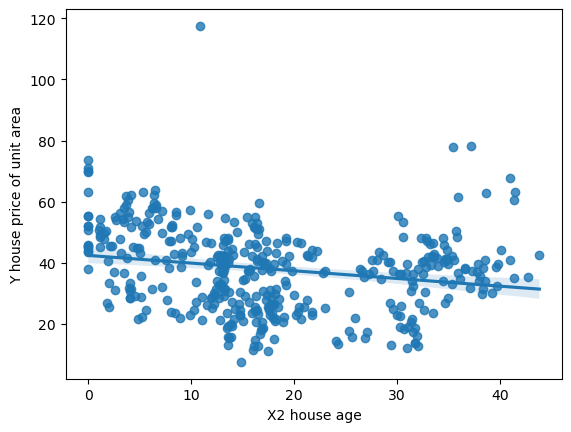

In [16]:
sns.regplot(x='X2 house age', y='Y house price of unit area',data=dataset)

### Plot Distance to MRT station Vs Price

<AxesSubplot: xlabel='Y house price of unit area', ylabel='X3 distance to the nearest MRT station'>

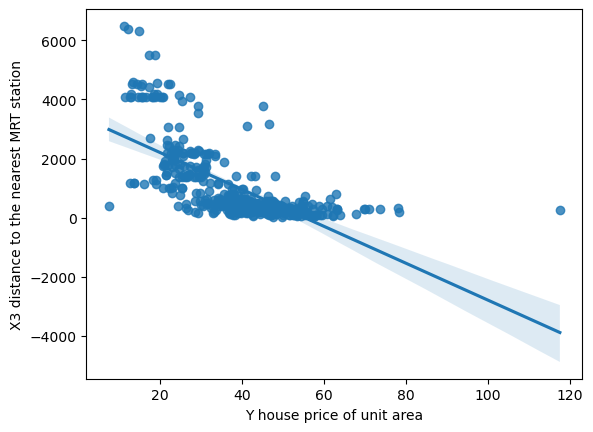

In [17]:
sns.regplot(x='Y house price of unit area', y='X3 distance to the nearest MRT station',data=dataset)

### Plot Number of Convienience Stores Vs Price

<AxesSubplot: xlabel='Y house price of unit area', ylabel='X4 number of convenience stores'>

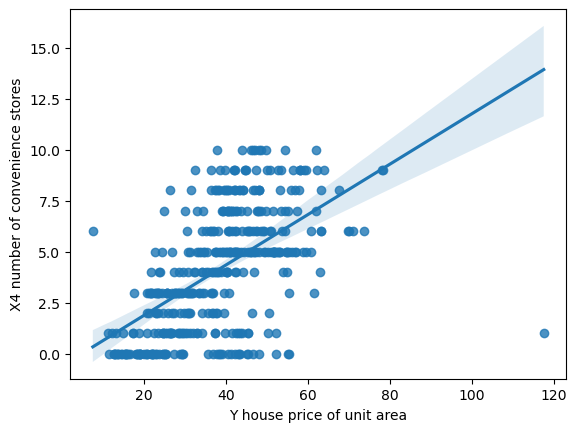

In [18]:
sns.regplot(x='Y house price of unit area', y='X4 number of convenience stores',data=dataset)